In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Implements of K_Means algorithm**

In [ ]:
# fundamental libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rd
import math

In [ ]:
def distance(P1, P2):
  distance = np.linalg.norm(np.array(P1)-np.array(P2), 2)
  return distance

def K_means(dataset, initial_centroids, max_of_iterations, mode):

  # Set of new centroids
  new_centroids = initial_centroids
  number_of_points = len(dataset)
  number_of_clusters = len(initial_centroids)

  # Index set for clusters where the points belong
  clusters_assignment = [0 for p in range(number_of_points)]

  for j in range(max_of_iterations):
    # Update cluster assignments
    for p in range(number_of_points):
      min = distance(dataset[p], new_centroids[0])
      for k in range(number_of_clusters):
        a = distance(dataset[p], new_centroids[k])
        if a <= min:
          min = a
          clusters_assignment[p] = k

    # variable for stopping criterion
    delta = 0

    # Update centroid locations
    for k in range(number_of_clusters):
      size = 0
      sum = np.array([0, 0])
      centroid = np.array([0, 0])
      for p in range(number_of_points):
        if clusters_assignment[p] == k:
          size = size + 1
          sum = sum + dataset[p]
      if size != 0:
        centroid = sum / size
        delta = delta + np.linalg.norm(new_centroids[k]-centroid, 2)
        new_centroids[k] = centroid

    print(delta)
    if delta < 1e-3:
      print('the number of iterations:', j+1)
      break

  # Update cluster assignments using final centroids
  for p in range(number_of_points):
    min = distance(dataset[p], new_centroids[0])
    for k in range(number_of_clusters):
        a = distance(dataset[p], new_centroids[k])
        if a < min:
          min = a
          clusters_assignment[p] = k

  # Mode selection for output of the algorithm
  if mode == 1:
    return new_centroids
  elif mode == 2:
    return clusters_assignment
  else:
    print('Mode Error')

# **Task 1: Toy problem**

In [ ]:
# initial datasets
data1_array = [[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]]
initial_centroids_of_1 = [[2, 10], [5, 8], [1, 2]]

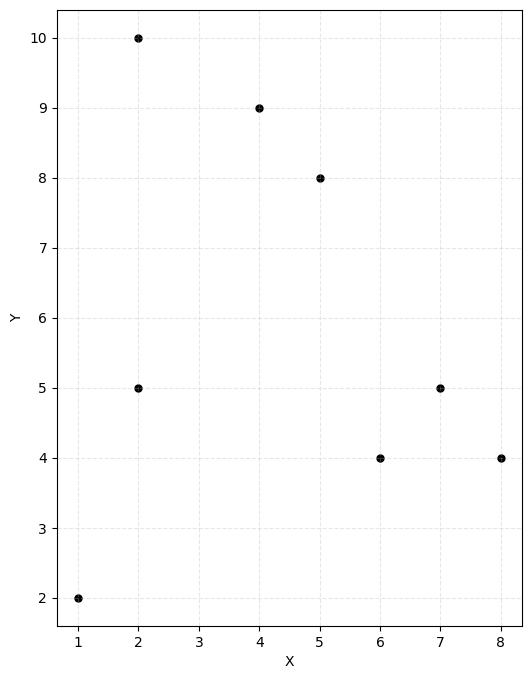

In [ ]:
# visualization of the inputs
data1_X = np.array(data1_array).T[0]
data1_Y = np.array(data1_array).T[1]

plt.figure(figsize=(6, 8))
plt.scatter(data1_X, data1_Y, marker='.', c='black', s=100)
plt.xlabel('X', fontsize = 10)
plt.ylabel('Y', fontsize = 10)
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()

In [ ]:
# applying the K-Means Algorithm
new_centroids_of_1 = K_means(data1_array, initial_centroids_of_1, 100, 1)
print(new_centroids_of_1)
colors_1 = K_means(data1_array, new_centroids_of_1, 100, 2)

3.81720680758398
2.0194218076158923
1.8774970071784725
0.0
the number of iterations: 4
[array([3.66666667, 9.        ]), array([7.        , 4.33333333]), array([1.5, 3.5])]
0.0
the number of iterations: 1


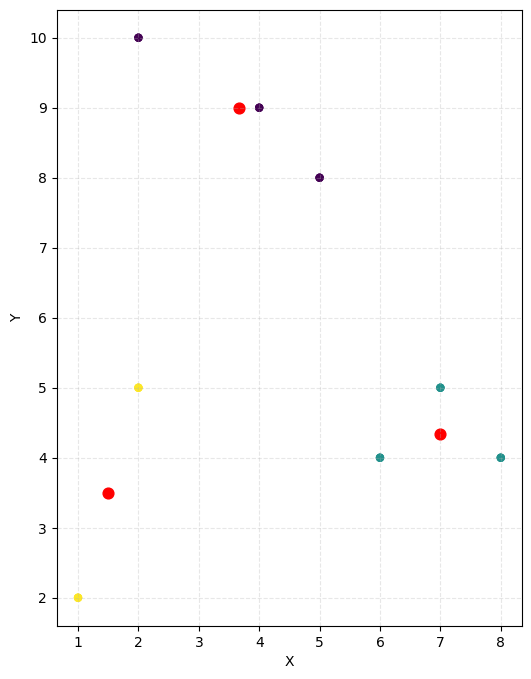

In [ ]:
# visualization of the result
data1_X = np.array(data1_array).T[0]
data1_Y = np.array(data1_array).T[1]

plt.figure(figsize=(6, 8))
for i in range(3):
  plt.scatter(data1_X, data1_Y, marker='.', c=colors_1, s=100)
for i in range(3):
  plt.scatter(new_centroids_of_1[i][0], new_centroids_of_1[i][1], color='red', s= 60)
plt.xlabel('X', fontsize = 10)
plt.ylabel('Y', fontsize = 10)
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()

# **Task 2: Open-ended problem**

In [ ]:
data2 = pd.read_csv("/content/South_Korea_territory.csv")
data2.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/South_Korea_territory.csv'

In [ ]:
# input for the process
data2_boundary = np.column_stack([data2['Longitude (deg)'], data2['Latitude (deg)']])

NameError: name 'np' is not defined

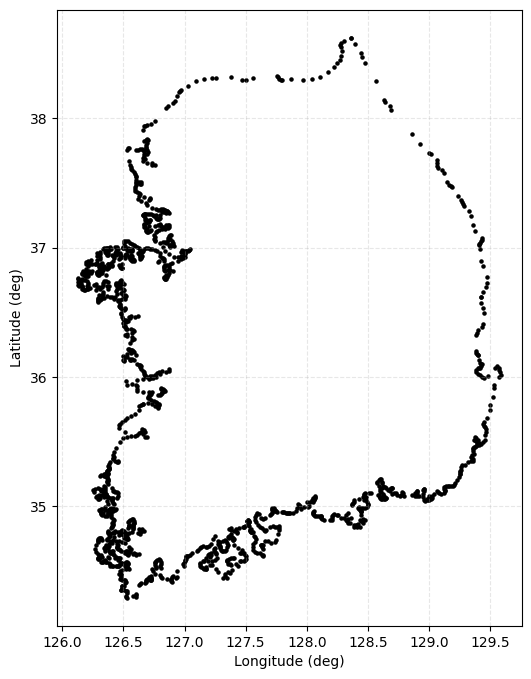

In [ ]:
# visualization of the data
plt.figure(figsize=(6, 8))
plt.scatter(data2['Longitude (deg)'], data2['Latitude (deg)'], marker='.', color='black', s=20)
plt.xlabel('Longitude (deg)', fontsize = 10)
plt.ylabel('Latitude (deg)', fontsize = 10)
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()

In [ ]:
# smoothing the boundary data
x0 = round(data2_boundary[0][0], 2)
y0 = round(data2_boundary[0][1], 2)

data2_boundary2 = [[x0, y0]]

for i in range(1, len(data2_boundary)):
  xi = round(data2_boundary[i][0], 2)
  yi = round(data2_boundary[i][1], 2)
  if [xi, yi] not in data2_boundary:
    data2_boundary2 = data2_boundary2 + [[xi, yi]]

for i in range(1, len(data2_boundary2)):
  if distance(data2_boundary2[i], data2_boundary2[i-1]) >= 0.01:
    x_diff = abs(round((data2_boundary2[i][0] - data2_boundary2[i-1][0])*100))
    y_diff = abs(round((data2_boundary2[i][1] - data2_boundary2[i-1][1])*100))
    vec_diff = [x_diff, y_diff]
    steps = max(vec_diff)
    for j in range(1, steps+1):
      alpha = j/steps
      xj = round(data2_boundary2[i][0]*alpha + data2_boundary2[i-1][0]*(1-alpha), 2)
      yj = round(data2_boundary2[i][1]*alpha + data2_boundary2[i-1][1]*(1-alpha), 2)
      data2_boundary2 = data2_boundary2 + [[xj, yj]]

data2_Xb2 = np.array(data2_boundary2).T[0]
data2_Yb2 = np.array(data2_boundary2).T[1]

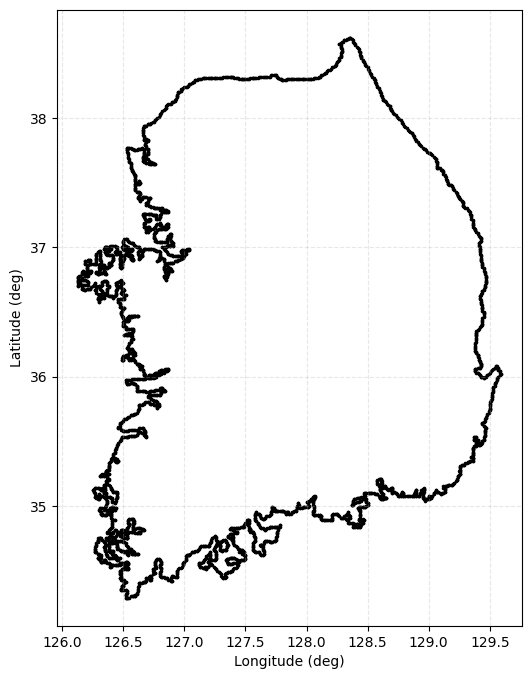

In [ ]:
# visualization of the data
plt.figure(figsize=(6, 8))
plt.scatter(data2_Xb2, data2_Yb2, marker='.', color='black', s=10)
plt.xlabel('Longitude (deg)', fontsize = 10)
plt.ylabel('Latitude (deg)', fontsize = 10)
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()

In [ ]:
map = np.array([[0 for j in range(370)] for i in range(510)])

for i in range(len(data2_boundary2)):
  index_x = round((data2_boundary2[i][0] - 126)*100)
  index_y = round((data2_boundary2[i][1] - 34)*100)
  map[index_y][index_x] = 1

In [ ]:
data2_internal2 = [[128.0, 36.0]]

for i in range(1, 1+500):
  boundary = 0
  for j in range(1, 1+365):
    if map[i][j] == 1:
      if  i>50 and j<100:
        boundary = 1
      elif 280<i<310 and j<150:
        boundary = 1
      elif 420<i<450 and j<220:
       boundary = 1
      else:
        boundary = 0
    if map[i][j] == 0 and boundary == 1:
      map[i][j] = 1

for i in range(1, 1+500):
  for j in range(1, 1+365):
    if map[i][j] == 1:
      x = (j/100)+126
      y = (i/100)+34
      data2_internal2 = data2_internal2 + [[x, y]]

print(len(data2_internal2))

94113


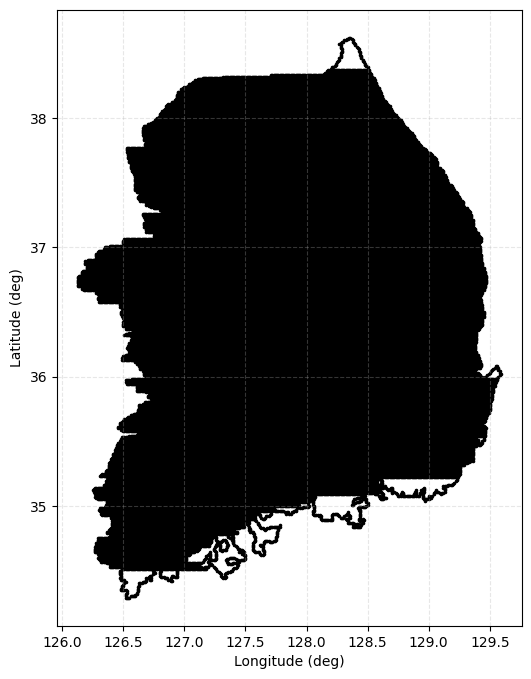

In [ ]:
data2_X2 = np.array(data2_internal2).T[0]
data2_Y2 = np.array(data2_internal2).T[1]

# visualization of the data
plt.figure(figsize=(6, 8))
plt.scatter(data2_X2, data2_Y2, marker='.', color='black', s=10)
plt.xlabel('Longitude (deg)', fontsize = 10)
plt.ylabel('Latitude (deg)', fontsize = 10)
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()

In [ ]:
# random initial centroids for input data
number_of_clusters_2p = 10
initial_centroids_of_2p = [rd.choice(data2_internal2) for i in range(number_of_clusters_2p)]

In [ ]:
# implementing the algorithm
new_centroids_of_2p = K_means(data2_internal2, initial_centroids_of_2p, 100, 1)
colors_2p = K_means(data2_internal2, new_centroids_of_2p, 100, 2)

data2_Xi2 = np.array(data2_internal2).T[0]
data2_Yi2 = np.array(data2_internal2).T[1]

2.5502855384564853
0.9492084616640976
0.48513338482789364
0.2991807275160438
0.22475184086196723
0.19645722231485838
0.1814930605254703
0.17116002924898202
0.1582248834001166
0.15043494044910827
0.14072410268645852
0.12986419468662067
0.11856491594371998
0.10647961913968809
0.09373338803297784
0.08121311944980111
0.07363546453620029
0.06431780732251137
0.05594022815438251
0.04938343360312873
0.04280988464281444
0.0389297449339691
0.03586191097897949
0.03174123600535614
0.027559825914217413
0.025662437488171354
0.020653810419255795
0.020691136251899077
0.016851809650993636
0.017375868825822437
0.014446560573803564
0.012107369565596559
0.013074544530989213
0.010498901668653901
0.008535148939716552
0.00792902813657597
0.007538487567546029
0.006335151292923471
0.005319943637792071
0.004979012474812705
0.004300384723370042
0.0030863829303226635
0.0028159460562366457
0.002530960724238381
0.002259971492773196
0.0026122378925267082
0.003044911376976126
0.0021220173315189598
0.00233454791437802

In [ ]:
# visualization of the result
plt.figure(figsize=(6, 8))
plt.scatter(data2_Xi2, data2_Yi2, marker='.', c=colors_2p, s=20)
for i in range(number_of_clusters_2p):
  plt.scatter(new_centroids_of_2p[i][0], new_centroids_of_2p[i][1], color='red')
plt.xlabel('Longitude (deg)', fontsize = 10)
plt.ylabel('Latitude (deg)', fontsize = 10)
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()

NameError: name 'plt' is not defined

# **Task 3: Real-world problem**

In [ ]:
data3 = pd.read_csv("/content/Vertiport_candidates.csv")
data3.head()

,Longitude (deg),Latitude (deg)
0,126.940197,37.621876
1,127.096292,37.535756
2,126.939432,37.492020
3,127.033749,37.612760
4,126.839673,37.561111


In [ ]:
# input for the process
data3_array = np.column_stack([data3['Longitude (deg)'], data3['Latitude (deg)']])

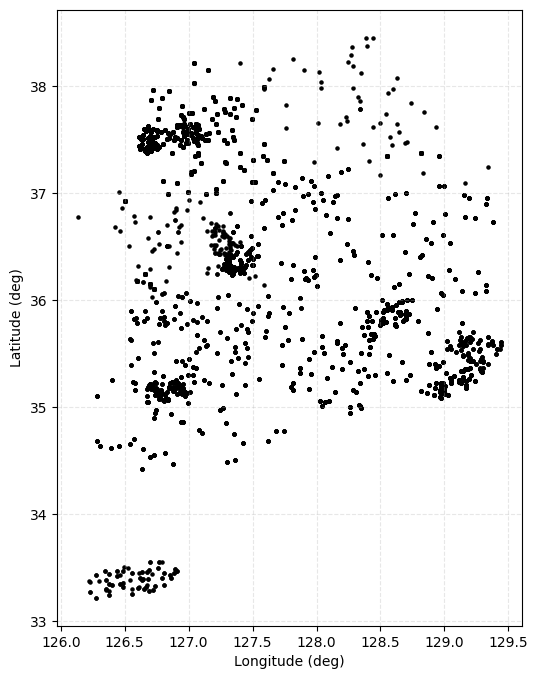

In [ ]:
# visualization of the data
plt.figure(figsize=(6, 8))
plt.scatter(data3['Longitude (deg)'], data3['Latitude (deg)'], marker='.', color='black', s=20)
plt.xlabel('Longitude (deg)', fontsize = 10)
plt.ylabel('Latitude (deg)', fontsize = 10)
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()

In [ ]:
# K-means Algorithm 3 - retaining points + skipping points

def distance(P1, P2):
  distance = np.linalg.norm(np.array(P1)-np.array(P2), 2)
  return distance

def K_means3(dataset, initial_centroids, retain_count, skip_array, max_of_iterations, mode):

  # 1. Set of new centroids
  new_centroids = initial_centroids
  number_of_points = len(dataset)
  number_of_clusters = len(initial_centroids)

  # Split into Fixed and Flexible Centroids
  fixed_centroids = initial_centroids[:retain_count]
  flexible_centroids = initial_centroids[retain_count:]
  num_flex_clusters = len(flexible_centroids)

  # Index set for clusters where the points belong
  clusters_assignment = [0 for p in range(number_of_points)]

  for j in range(max_of_iterations):
    # 2. Update cluster assignments
    # for each point p, calculate its distance with all centroids and assign it to the closest centroid
    for p in range(number_of_points):
      min = np.inf
      for k in range(number_of_clusters):
        a = distance(dataset[p], new_centroids[k])
        if a <= min:
          min = a
          clusters_assignment[p] = k

    # variable for stopping criterion
    delta = 0

    # 3. Update centroid locations
    for k in range(num_flex_clusters): #for every cluster k in flexible array,
      size = 0
      sum = np.array([0, 0])
      centroid = np.array([0, 0])
      for p in range(number_of_points): #for every point p
        if clusters_assignment[p] == (retain_count + k):
          size = size + 1
          sum = sum + dataset[p] #sum up all the distances
      if size != 0:
        centroid = sum / size  #get the mean, make centroid equal to it
        delta = delta + np.linalg.norm(flexible_centroids[k]-centroid, 2)
        flexible_centroids[k] = centroid #change initial centroid point to the new centroid

    #print(delta)
    if delta < 1e-3:
      print('the number of iterations:', j+1)
      break

  # 4. Update cluster assignments using final centroids
  for p in range(number_of_points):
    min = np.inf
    for k in range(number_of_clusters):
        a = distance(dataset[p], new_centroids[k])
        if a < min:
            min = a
            clusters_assignment[p] = k

  # 6. for each new centroid point, replace it with a point closest to it from existing points
  tolerance = 1e-14
  for k in range(num_flex_clusters): #for each new centroid in flexible array
    min = np.inf
    min_point = dataset[0]
    for p in range(number_of_points): #calculate its distance with every point
        b = distance(flexible_centroids[k], dataset[p])
        if b < min: #if that point has closer distance, replace it with that existing point
          result = any(np.allclose(dataset[p], sublist, atol=tolerance) for sublist in skip_array)
          if result: #if the point is in skip array, skip
            continue
          min_point = dataset[p]
          min = b
    flexible_centroids[k] = min_point


  # 7. Combine fixed list with flexible list
  combined_array = np.concatenate((fixed_centroids, flexible_centroids), axis=0)


 # 5. Mode selection for output of the algorithm
  if mode == 1:
    return combined_array
  elif mode == 2:
    return clusters_assignment
  else:
    print('Mode Error')

In [ ]:
# K-means Algorithm 2 - when skipping array or retaining feature is not needed

def distance(P1, P2):
  distance = np.linalg.norm(np.array(P1)-np.array(P2), 2)
  return distance

def K_means2(dataset, initial_centroids, skip_array, max_of_iterations, mode):

  # Set of new centroids
  new_centroids = initial_centroids
  number_of_points = len(dataset)
  number_of_clusters = len(initial_centroids)

  # Index set for clusters where the points belong
  clusters_assignment = [0 for p in range(number_of_points)]

  for j in range(max_of_iterations):
    # Update cluster assignments
    # for each point p, calculate its distance with all centroids and assign it to the closest centroid
    for p in range(number_of_points):
      min = np.inf
      for k in range(number_of_clusters):
        a = distance(dataset[p], new_centroids[k])
        if a <= min:
          min = a
          clusters_assignment[p] = k

    # variable for stopping criterion
    delta = 0

    # Update centroid locations
    for k in range(number_of_clusters): #for every cluster k
      size = 0
      sum = np.array([0, 0])
      centroid = np.array([0, 0])
      for p in range(number_of_points): #for every point p
        if clusters_assignment[p] == k:
          size = size + 1
          sum = sum + dataset[p] #sum up all the distances
      if size != 0:
        centroid = sum / size  #get the mean, make centroid equal to it
        delta = delta + np.linalg.norm(new_centroids[k]-centroid, 2)
        new_centroids[k] = centroid #change initial centroid point to the new centroi

    # for each new centroid point, replace it with a point closest to it from existing points

    #print(delta)
    if delta < 1e-3:
      print('the number of iterations:', j+1)
      break

    # Update cluster assignments using final centroids
    for p in range(number_of_points):
        min = np.inf
        for k in range(number_of_clusters):
            a = distance(dataset[p], new_centroids[k])
            if a < min:
              min = a
            clusters_assignment[p] = k

  tolerance = 1e-14
  for k in range(number_of_clusters): #for each new centroid
    min = np.inf
    min_point = dataset[0]
    for p in range(number_of_points): #calculate its distance with every point
        b = distance(new_centroids[k], dataset[p])
        if b < min: #if that point has closer distance, replace it with that existing point
          min_point = dataset[p]
          min = b
    new_centroids[k] = min_point
    print(new_centroids[k])

 # Mode selection for output of the algorithm
  if mode == 1:
    return new_centroids
  elif mode == 2:
    return clusters_assignment
  else:
    print('Mode Error')

## Code for Repeated Runs

The code below was repeated 10 times to reach a complete set of 17 feasible locations.

The code below shows just the first runs and the final run. After each run, the "prev_results" array (storing points already determined as 'feasible') and "skip_array" (storing points already determined as 'unfeasible') were modified.

The points that are outputted won't necessarily be the same as the points we have found because it may output points differently every run.

In [ ]:
# random initial centroids for input data
number_of_clusters_3 = 17
initial_centroids_of_3 = [rd.choice(data3_array) for i in range(number_of_clusters_3)]
empty_array = np.array([[0, 0]])

# implementing the algorithm
new_centroids_of_3 = K_means2(data3_array, initial_centroids_of_3, empty_array, 100, 1)
colors_3 = K_means2(data3_array, new_centroids_of_3, empty_array, 1, 2)

the number of iterations: 16
[126.9584151   37.56861894]
[126.72509886  36.09877055]
[126.66688972  37.41631568]
[128.08064316  35.26794341]
[127.41985916  37.82212693]
[127.43345255  36.25407981]
[128.83137026  37.18559708]
[128.62317215  35.95150192]
[126.9483713   37.81372286]
[127.03835076  38.02976903]
[126.99404274  37.00855971]
[126.90707214  35.12028866]
[129.07769411  35.28753271]
[127.13686457  37.54643208]
[127.49938334  37.31020477]
[126.62190097  33.39616132]
[128.07634771  36.78900008]
[126.9584151   37.56861894]
[126.72509886  36.09877055]
[126.70883183  37.46931559]
[128.08064316  35.26794341]
[127.41985916  37.82212693]
[127.43345255  36.25407981]
[128.83137026  37.18559708]
[128.62317215  35.95150192]
[126.9483713   37.81372286]
[127.03835076  38.02976903]
[126.99404274  37.00855971]
[126.90707214  35.12028866]
[129.07769411  35.28753271]
[127.13686457  37.54643208]
[127.49938334  37.31020477]
[126.62190097  33.39616132]
[128.07634771  36.78900008]


In [ ]:
# Print first 17 centroids -- get location

print("The centroid locations are: ")
for i, centroid in enumerate(initial_centroids_of_3):
    longitude = centroid[0]
    latitude = centroid[1]
    print(f"({latitude}, {longitude})")

The centroid locations are: 
(37.56861894068177, 126.95841509804463)
(36.098770549798, 126.72509886086905)
(37.469315588229165, 126.70883182837485)
(35.26794341117474, 128.0806431648178)
(37.82212693000587, 127.41985915952598)
(36.254079812220006, 127.4334525462182)
(37.18559707506109, 128.83137025875763)
(35.951501916843114, 128.62317214830145)
(37.81372285819808, 126.9483712965808)
(38.02976903283281, 127.038350761366)
(37.00855971315736, 126.994042741778)
(35.12028865991076, 126.90707214032774)
(35.28753270540142, 129.07769410613457)
(37.54643208264668, 127.1368645739098)
(37.31020476563264, 127.49938333504107)
(33.39616132357018, 126.62190097311274)
(36.789000083366126, 128.07634771275704)


### Example Results
(not the same as the results are different every run)


율리영해1길, 울주군, 울산광역시
(35.53608654312682, 129.2211948530974) ❌

태봉리.목다라맨골, 해운로, 태봉리, 서산시, 충청남도
(36.78277753915864, 126.56941052239416) ❌

덕평리, 여주시
(37.18172679839141, 127.65915182871387) ❌

26100, 북평면, 정선군, 강원특별자치도
(37.45006324125764, 128.5934748370431) ❌

공항로, 대저1동, 강서구, 부산광역시, 경상남도
(35.22326457307819, 128.99272367315277) ✅

기와집길, 상면, 가평군
(37.79203100352012, 127.351541512092) ❌

세천동, 대청동, 동구, 대전
(36.32441773035698, 127.49985568869496) ❌

후정동로, 삼산동, 부평구, 인천광역시
(37.5192288643404, 126.73648511066368) ❌

송내리, 금강로, 마서면, 서천군, 충청남도
(36.02857668679363, 126.7104527157177) ✅

작원길, 관문동, 북구, 대구광역시
(35.90289386606794, 128.54962196444197) ✅

금호로13길, 금호동2가, 금호2·3가동, 성동구
(37.55533815289316, 127.01924322691028) ✅


516로, 제주시, 제주특별자치도
(33.39616132357018, 126.62190097311274) ❌

율곡로, 파평면, 파주시
(37.9539107531379, 126.84789546801692) ❌

지곶동, 오산시
(37.172672974169195, 127.02071421099834) ❌

79, 제석로, 봉선동, 남구, 광주광역시
(35.12028865991076, 126.90707214032774) ❌

진산로, 집현면, 진주시, 경상남도
(35.26794341117474, 128.0806431648178) ❌

마령리, 안동시, 경상북도
(36.60891820923674, 128.9898336807343) ❌

In [ ]:
# save feasible points

data =[[128.99272367315277, 35.22326457307819],
        [126.7104527157177, 36.02857668679363],
        [128.54962196444197, 35.90289386606794],
       [126.90707214032774, 35.12028865991076]]
prev_results = np.array(data)

# fill the rest with random points and create new initial points
random_points = [rd.choice(data3_array) for i in range(13)]

new_initial_centroids = np.concatenate((prev_results, random_points), axis=0)

# save infeasible points to ignore (example)

skip = [[129.2211948530974, 35.53608654312682],
 [126.62190097311274, 33.39616132357018],
  [128.83137025875763, 37.18559707506109],
   [127.46381266710787, 35.70001740128822],
        [126.84088284172287, 36.98558325400245],
         [126.9483712965808, 37.81372285819808],
        [126.69451617156469, 36.12187607621143],
        [127.75656661151976, 37.08374529870423],
        [128.9898336807343, 36.60891820923674],
        [127.61709913028672, 35.851295878943326],
        [127.65915182871387, 37.18172679839141],
        [126.50307136712102, 36.92635600229559],
        [128.9131167830516, 36.7287682206103]]

skip_array = np.array(skip)


# Then repeat this process until finding the 17 points

### Final Run

In [ ]:
# save points to skip

skip = [[127.694981051797, 37.09839607074066],
 [126.62190097311274, 33.39616132357018],
  [128.83137025875763, 37.18559707506109],
   [127.46381266710787, 35.70001740128822],
        [126.84088284172287, 36.98558325400245],
         [126.9483712965808, 37.81372285819808],
        [126.69451617156469, 36.12187607621143],
        [127.75656661151976, 37.08374529870423],
        [128.9898336807343, 36.60891820923674],
        [127.61709913028672, 35.851295878943326],
        [127.65915182871387, 37.18172679839141],
        [126.50307136712102, 36.92635600229559],
        [128.9131167830516, 36.7287682206103],
        [129.00453933234147, 36.80693034902249],
        [126.84789546801692, 37.9539107531379],
        [127.66159923261532, 37.02924587729203]]

skip_array = np.array(skip)

# save feasible points

data =[[128.99272367315277, 35.22326457307819],
        [126.7104527157177, 36.02857668679363],
        [128.54962196444197, 35.90289386606794],
       [126.90707214032774, 35.12028865991076],
       [127.05443689585395, 37.57413276609445],
       [126.72892672038589, 37.444572756838355],
       [127.0418650099629, 37.202599643766085],
       [127.46033132007572, 36.37081996060313],
       [126.65539118876944, 36.24250391173575],
       [128.0806431648178, 35.26794341117474],
       [127.4921402895598, 37.69514149212],
       [129.19903673084775, 35.6483138842912],
       [126.59583571882824, 36.18037087057407],
       [128.5934748370431, 37.45006324125764],
       [128.3993954905465, 35.28826759130104],
       [129.2061362463222, 35.30121007741285]]
prev_results = np.array(data)

# fill the rest with random points and create new initial points
random_points = [rd.choice(data3_array) for i in range(1)]

new_initial_centroids = np.concatenate((prev_results, random_points), axis=0)


In [ ]:
# implementing the algorithm
new_centroids_of_3 = K_means3(data3_array, new_initial_centroids, 16, skip_array, 100, 1)
colors_3 = K_means3(data3_array, new_centroids_of_3, 16, skip_array, 1, 2)

the number of iterations: 4


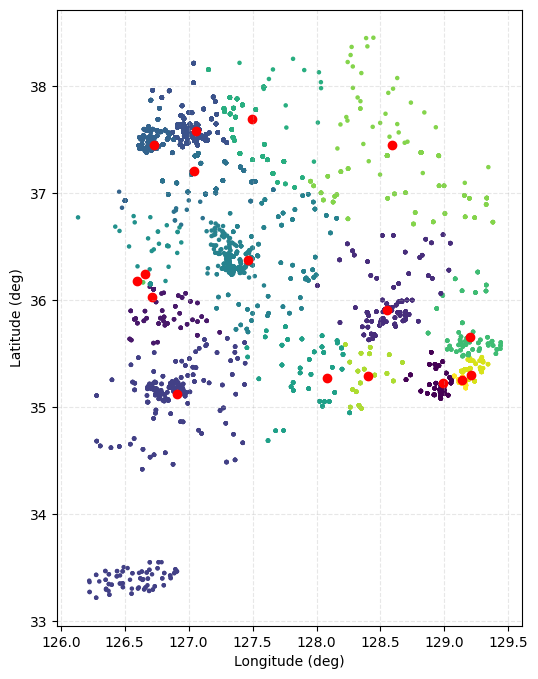

In [ ]:
# visualization of the result
number_of_clusters_3 = 17
plt.figure(figsize=(6, 8))
plt.scatter(data3['Longitude (deg)'], data3['Latitude (deg)'], marker='.', c=colors_3, s=20)
for i in range(number_of_clusters_3):
  plt.scatter(new_centroids_of_3[i][0], new_centroids_of_3[i][1], color='red')
plt.xlabel('Longitude (deg)', fontsize = 10)
plt.ylabel('Latitude (deg)', fontsize = 10)
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()

In [ ]:
print("The centroid locations are: ")
for i, centroid in enumerate(new_centroids_of_3):
    longitude = centroid[0]
    latitude = centroid[1]
    print(f"({latitude}, {longitude})")

The centroid locations are: 
(35.22326457307819, 128.99272367315277)
(36.02857668679363, 126.7104527157177)
(35.90289386606794, 128.54962196444197)
(35.12028865991076, 126.90707214032774)
(37.57413276609445, 127.05443689585395)
(37.444572756838355, 126.72892672038589)
(37.202599643766085, 127.0418650099629)
(36.37081996060313, 127.46033132007572)
(36.24250391173575, 126.65539118876944)
(35.26794341117474, 128.0806431648178)
(37.69514149212, 127.4921402895598)
(35.6483138842912, 129.19903673084775)
(36.18037087057407, 126.59583571882824)
(37.45006324125764, 128.5934748370431)
(35.28826759130104, 128.3993954905465)
(35.30121007741285, 129.2061362463222)
(35.25009547002865, 129.13647075884003)
